# Import some library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [4]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Let's Convert the data type of the "rate" column to float and remove the denominator. 

In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
dataframe['rate'] = dataframe['rate'].apply(handleRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Summary of the data frame 

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Conclusion:- There is no NULL value in dataframe

# Type of Resturent

Text(0.5, 0, 'Type of Restuarant')

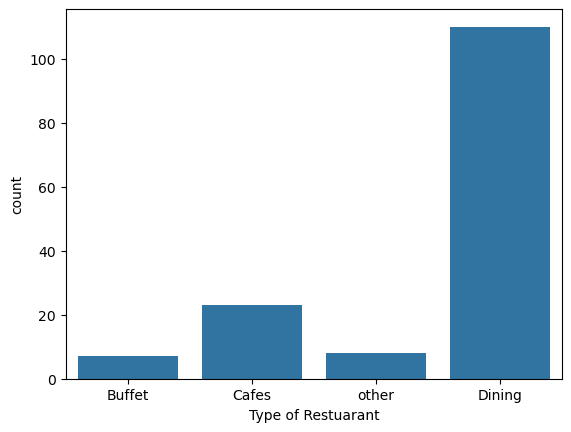

In [8]:
sns.countplot(x = dataframe["listed_in(type)"])
plt.xlabel("Type of Restuarant")

# Conclusion:- The majority of the resturent fall into the dining catogory.

# Dining resturents are preferred by a larger number of individuals

Text(0, 0.5, 'Votes')

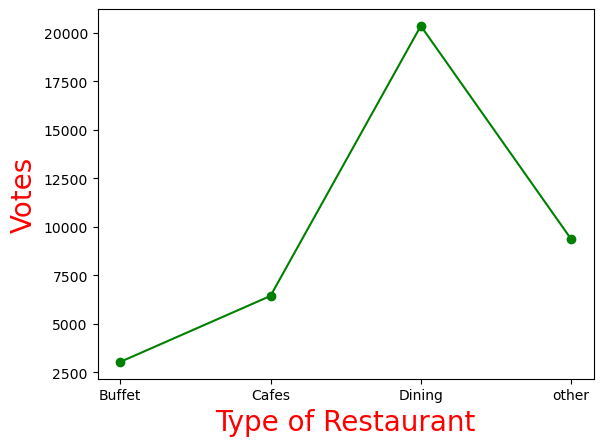

In [9]:
grouped_data = dataframe.groupby("listed_in(type)")['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = "green", marker = "o")
plt.xlabel("Type of Restaurant", c = "red", size = 20)
plt.ylabel("Votes", c= "red", size = 20)

# Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [10]:
max_votes = dataframe["votes"].max()
restaurant_with_max_votes = dataframe.loc[dataframe["votes"] == max_votes, 'name']
print(restaurant_with_max_votes)

38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

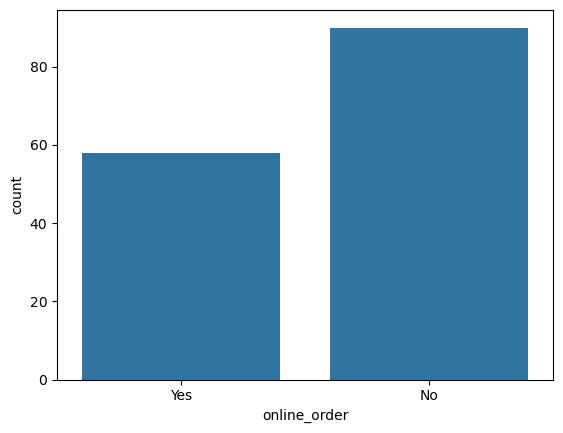

In [12]:
sns.countplot(x=dataframe['online_order'])

# Conclusion: This suggests that a majority of the restaurants do not accept online orders.

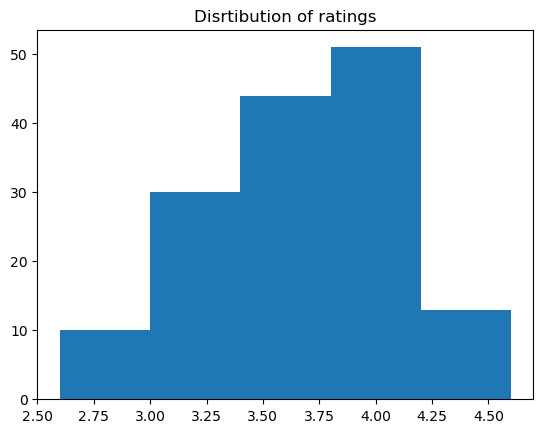

In [13]:
plt.hist(dataframe["rate"],bins =5)
plt.title("Disrtibution of ratings")
plt.show()

# Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

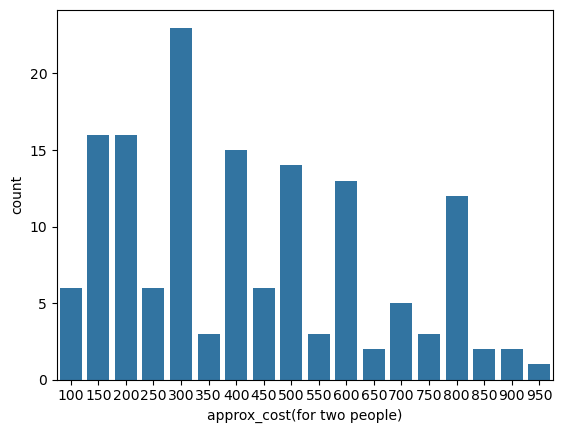

In [14]:
couple_date = dataframe["approx_cost(for two people)"]
sns.countplot(x= couple_date)

# Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

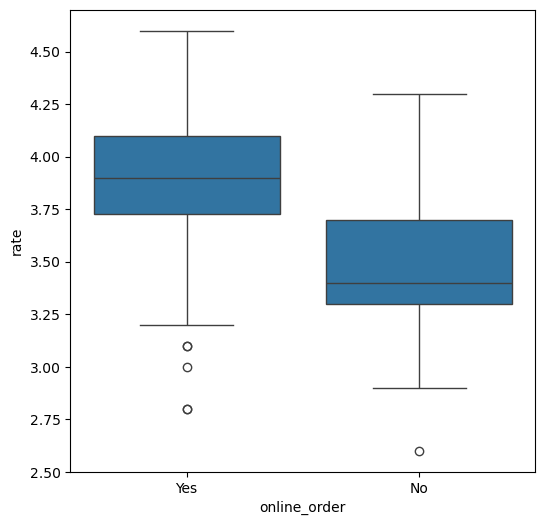

In [15]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

# CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

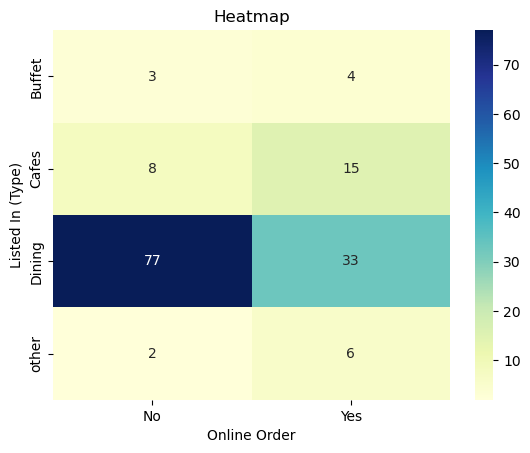

In [16]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders.
# This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.